# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import datetime
import scipy.stats as st
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url =f'{url}&q={city}&appid={weather_api_key}&units=metric'
    response=requests.get(city_url)
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
 # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]
 
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
   
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | inhambane
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | soyo
Processing Record 5 of Set 1 | bathsheba
Processing Record 6 of Set 1 | wajima
Processing Record 7 of Set 1 | ahuimanu
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | chengmai
City not found. Skipping...
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | dawson creek
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | mareeba
Processing Record 16 of Set 1 | makakilo city
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | mildura
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | havoysund
Processing Record 21 of Set 1 | oneonta
Processing R

Processing Record 38 of Set 4 | alora
Processing Record 39 of Set 4 | weston
Processing Record 40 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 41 of Set 4 | waipawa
Processing Record 42 of Set 4 | rio grande
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | khonuu
City not found. Skipping...
Processing Record 45 of Set 4 | ngama
Processing Record 46 of Set 4 | nassau
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | abha
Processing Record 49 of Set 4 | north myrtle beach
Processing Record 0 of Set 5 | tembisa
Processing Record 1 of Set 5 | mwense
Processing Record 2 of Set 5 | nicoya
Processing Record 3 of Set 5 | mantena
Processing Record 4 of Set 5 | margate
Processing Record 5 of Set 5 | iles
Processing Record 6 of Set 5 | tilichiki
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | birao
Processing Record 9 of Set 5 | hanmer sp

Processing Record 26 of Set 8 | madimba
Processing Record 27 of Set 8 | ladario
Processing Record 28 of Set 8 | port hedland
Processing Record 29 of Set 8 | hearst
Processing Record 30 of Set 8 | te anau
Processing Record 31 of Set 8 | venancio aires
Processing Record 32 of Set 8 | cayenne
Processing Record 33 of Set 8 | dubrovka
Processing Record 34 of Set 8 | kavaratti
Processing Record 35 of Set 8 | merauke
Processing Record 36 of Set 8 | mount gambier
Processing Record 37 of Set 8 | cajati
Processing Record 38 of Set 8 | ayabaca
Processing Record 39 of Set 8 | si bun ruang
Processing Record 40 of Set 8 | biabou
Processing Record 41 of Set 8 | phonhong
Processing Record 42 of Set 8 | saint george
Processing Record 43 of Set 8 | quatre cocos
Processing Record 44 of Set 8 | paamiut
Processing Record 45 of Set 8 | yeniseysk
Processing Record 46 of Set 8 | boulder city
Processing Record 47 of Set 8 | letlhakane
Processing Record 48 of Set 8 | san roque
Processing Record 49 of Set 8 | lo

Processing Record 11 of Set 12 | iracoubo
Processing Record 12 of Set 12 | fecamp
Processing Record 13 of Set 12 | derzhavinsk
Processing Record 14 of Set 12 | pizarro
Processing Record 15 of Set 12 | nong khae
Processing Record 16 of Set 12 | konstantinovka
Processing Record 17 of Set 12 | dakar
Processing Record 18 of Set 12 | warrington
Processing Record 19 of Set 12 | nome
Processing Record 20 of Set 12 | namibe
Processing Record 21 of Set 12 | beihai
Processing Record 22 of Set 12 | cartagena
Processing Record 23 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 24 of Set 12 | shimoda
Processing Record 25 of Set 12 | mayskiy
Processing Record 26 of Set 12 | victoria point
Processing Record 27 of Set 12 | elizabeth city
Processing Record 28 of Set 12 | tarakan
Processing Record 29 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 30 of Set 12 | sao paulo de olivenca
Processing Record 31 of Set 12 | beloha
Processing Record 32 of Set 12 | anse-bertrand
Proces

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [11]:
# Display sample data                      
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,11.81,66,75,8.23,AR,1675018050
1,inhambane,-23.8650,35.3833,27.99,74,20,4.63,MZ,1675018421
2,rikitea,-23.1203,-134.9692,25.88,74,88,4.98,PF,1675018422
3,soyo,-6.1349,12.3689,26.71,80,100,0.68,AO,1675018422
4,bathsheba,13.2167,-59.5167,28.34,57,20,6.69,BB,1675018423


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#Convert Date by Using pandas to_datetime
city_data_df['Date']= pd.to_datetime(city_data_df['Date'],unit='s').dt.strftime('%Y-%m-%d %H:%M')  

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,11.81,66,75,8.23,AR,2023-01-29 18:47
1,inhambane,-23.8650,35.3833,27.99,74,20,4.63,MZ,2023-01-29 18:53
2,rikitea,-23.1203,-134.9692,25.88,74,88,4.98,PF,2023-01-29 18:53
3,soyo,-6.1349,12.3689,26.71,80,100,0.68,AO,2023-01-29 18:53
4,bathsheba,13.2167,-59.5167,28.34,57,20,6.69,BB,2023-01-29 18:53


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

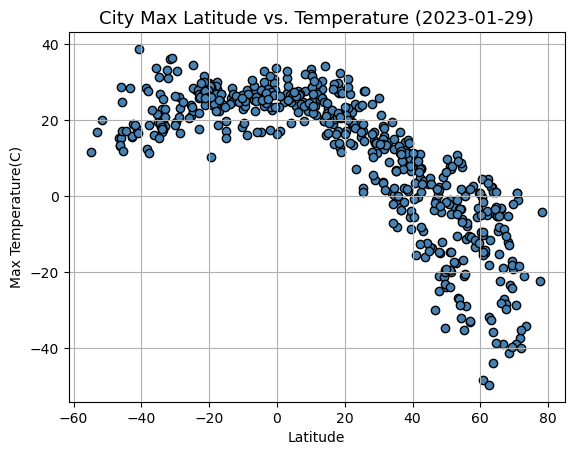

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors="black",facecolors="steelblue")
plt.grid()
plt.title("City Max Latitude vs. Temperature (2023-01-29)",fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

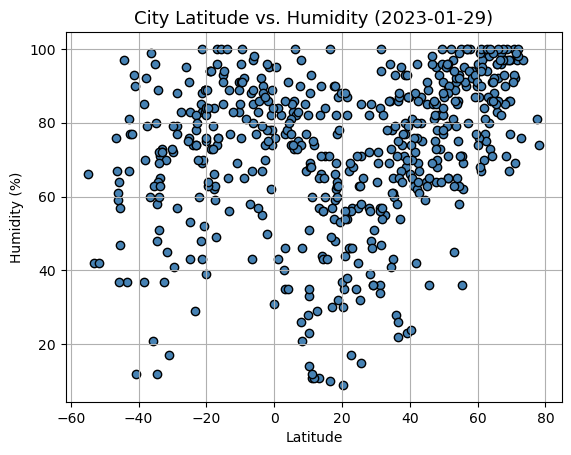

In [16]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors="black",facecolors="steelblue")
plt.grid()
plt.title("City Latitude vs. Humidity (2023-01-29)",fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

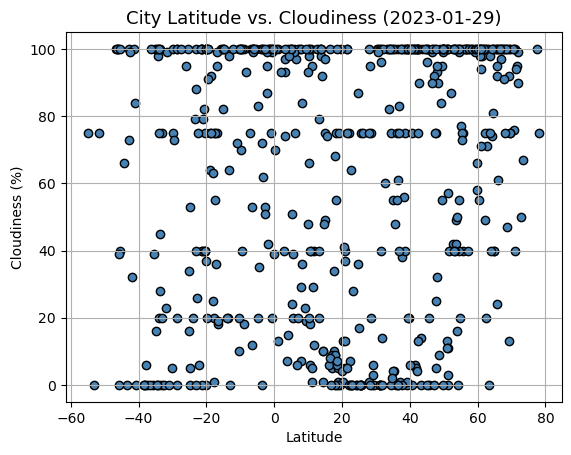

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors="black",facecolors="steelblue")
plt.grid()
plt.title("City Latitude vs. Cloudiness (2023-01-29)",fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

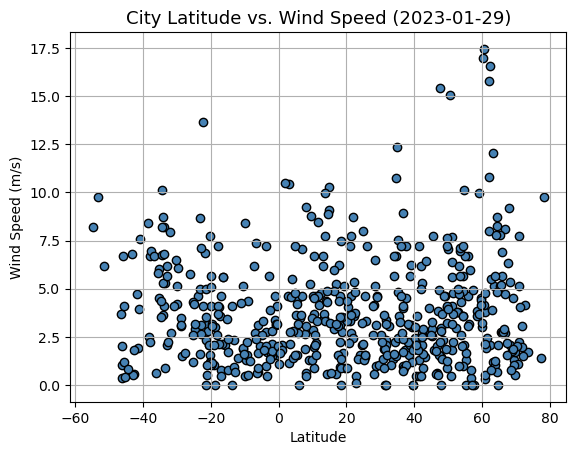

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors="black",facecolors="steelblue")
plt.grid()
plt.title("City Latitude vs. Wind Speed (2023-01-29)",fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def Linear_Regression(x_value, y_value, x_label, y_label,x_text,y_text,fig_num):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values=x_value * slope + intercept
    line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    print(f'The r-value is: {rvalue}')
    plt.scatter(x_value, y_value, color="#1f77b4",s=40)
    plt.plot(x_value, regress_values,color='red')
    plt.xlabel(f"{x_label}", fontsize =13)
    plt.ylabel(f"{y_label}", fontsize =13)
    #xmin, xmax = plt.xlim()
    #xtext = (xmin + xmax) // 2
    #ytext = slope*xtext + intercept
    
    plt.annotate(line_eq,(x_text,y_text), fontsize=14, color="red")
    plt.savefig(f'output_data/Fig{fig_num}.png')
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df=northern_hemi_df.reset_index()
# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,4,bathsheba,13.2167,-59.5167,28.34,57,20,6.69,BB,2023-01-29 18:53
1,5,wajima,37.4000,136.9000,2.15,95,100,1.82,JP,2023-01-29 18:53
2,6,ahuimanu,21.4447,-157.8378,21.59,87,100,2.68,US,2023-01-29 18:53
3,8,longyearbyen,78.2186,15.6401,-4.09,74,75,9.77,SJ,2023-01-29 18:53
4,9,ponta do sol,32.6667,-17.1000,14.35,55,60,3.07,PT,2023-01-29 18:53


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]
southern_hemi_df=southern_hemi_df.reset_index()

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,ushuaia,-54.8000,-68.3000,11.81,66,75,8.23,AR,2023-01-29 18:47
1,1,inhambane,-23.8650,35.3833,27.99,74,20,4.63,MZ,2023-01-29 18:53
2,2,rikitea,-23.1203,-134.9692,25.88,74,88,4.98,PF,2023-01-29 18:53
3,3,soyo,-6.1349,12.3689,26.71,80,100,0.68,AO,2023-01-29 18:53
4,7,bambous virieux,-20.3428,57.7575,26.23,89,40,2.06,MU,2023-01-29 18:53


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8428140626682048


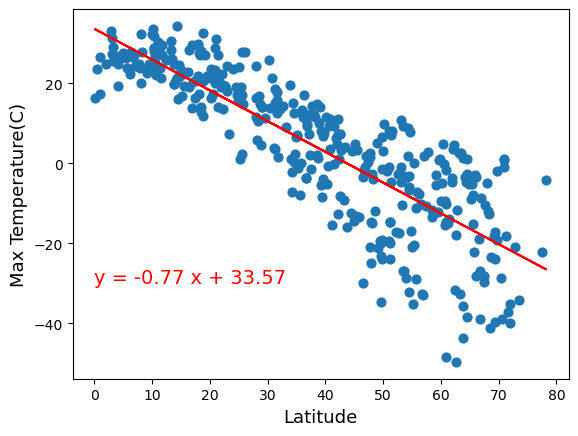

In [28]:
# Linear regression on Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Max Temp"]
x_label="Latitude"
y_label="Max Temperature(C)"
x_text=0
y_text=-30
fig_num =5
Linear_Regression(x_value, y_value, x_label, y_label, x_text,y_text,fig_num)


The r-value is: 0.39531000346013256


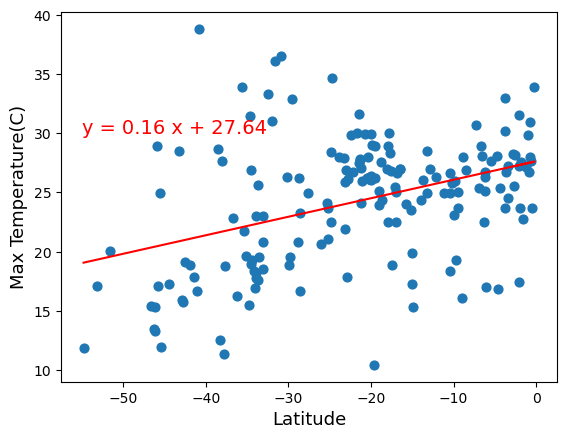

In [29]:
# Linear regression on Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Max Temp"]
x_label="Latitude"
y_label="Max Temperature(C)"
x_text=-55
y_text=30
fig_num=6
Linear_Regression(x_value, y_value, x_label, y_label, x_text,y_text,fig_num)

## Analysis between temperature and latitude 
**On Northern Hemisphere:** 
- As latitude increases, the maximum temperature falls.(A positive coefficient sign). 
- On Northern Hemisphere, the Maximum temperature is closely related to latitude.(r value -0.84) <br>
> We can see that the variation increases when the latitude reaches 50 degrees or more. **Through this, we infer that not only latitude but also other factors have a meaningful effect on the Maximum temperature in areas above 50 degrees.**
> And It can be seen that the variance of humidity is small at more than 50 degrees north latitude. <br>It is necessary to examine whether humidity affects temperature.
- We can predict that the Maximum temperature will drop 0.77 degrees for every 1 degree increase in latitude.

**On Southern Hemisphere:** 
- As latitude increases, the maximum temperature rises.(A negative coefficient sign). 
- On Southern Hemisphere, the Maximum temperature is a little related to latitude.(r value -0.39) <br>
> **It strongly suggests that there will be more variables that affect the Maximum temperature.** <br>
> At the end of this report, I will examine other influencing factors.
- We can see that the Maximum temperature will drop 0.16 degrees for every 1 degree decrease in latitude.

**Compare two Datasets:** 
- Two datasets show that the further away from the equator, the lower the maximum temperature.
- The northern Hemisphere has a high correlation between latitude and maximum temperature, but the southern Hemisphere has a lower correlation than the northern Hemisphere. The Maximum temperature in the southern Hemisphere is influenced by other factors as well as latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4839908707650124


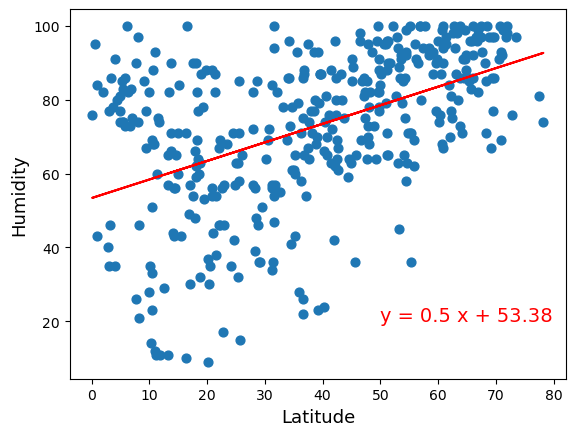

In [30]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Humidity"]
x_label="Latitude"
y_label="Humidity"
x_text=50
y_text=20
fig_num=7
Linear_Regression(x_value, y_value, x_label, y_label, x_text,y_text,fig_num)

The r-value is: 0.331509206065189


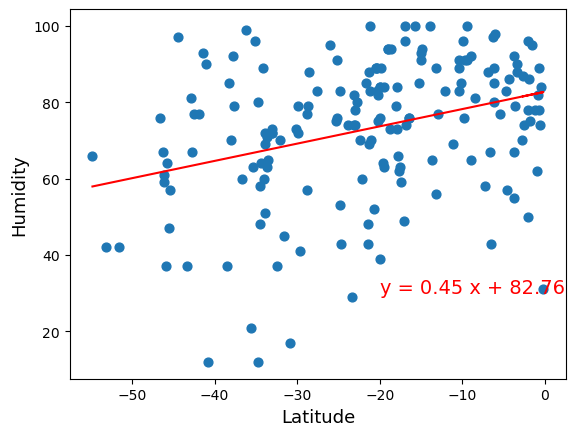

In [31]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Humidity"]
x_label="Latitude"
y_label="Humidity"
x_text=-20
y_text=30
fig_num=8
Linear_Regression(x_value, y_value, x_label, y_label, x_text,y_text,fig_num)

## Analysis between humidity and latitude  on Northern Hemisphere
- As latitude increases, the humidity increase.(A positive coefficient sign). 
- On Northern Hemisphere, The correlation between humidity and latitude is about 48 percent.(r value 0.48) <br>
- It means that less half of the variance in the outcome variable is explained by the model
> **However We can see that the variation decreases when the latitude reaches 50 degrees or more. Considering that the maximum temperature variance increases when the latitude is over 50 degrees, we need to research whether humidity affects temperature.**
- We can see that humidity will increase 0.5 for every 1 degree increase in latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29881869893263385


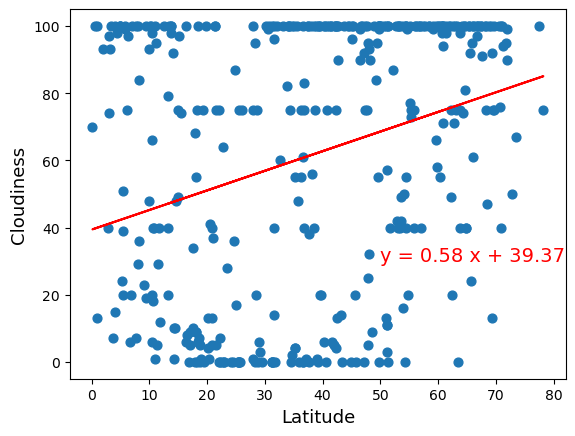

In [32]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness"
x_text=50
y_text=30
fig_num=9
Linear_Regression(x_value, y_value, x_label, y_label, x_text,y_text,fig_num)

The r-value is: 0.23141601239921866


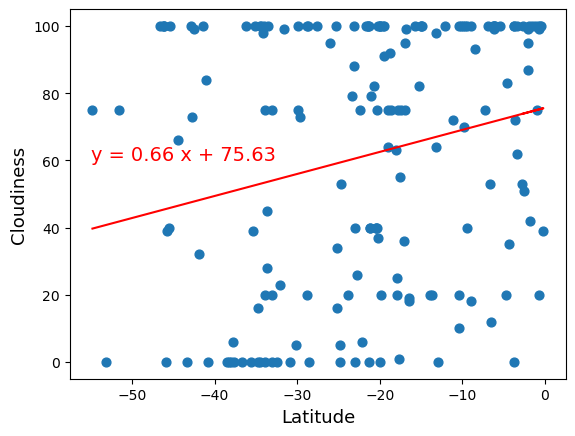

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Cloudiness"]
x_label="Latitude"
y_label="Cloudiness"
x_text=-55
y_text=60
fig_num=10
Linear_Regression(x_value, y_value, x_label, y_label, x_text,y_text,fig_num)

## Analysis between cloudiness and latitude  
- The corelation between latitude and cloudiness is low in both the northern and southern hemisphere(Northern r value : 0.29, Southern r value is 0.23). Therefore, it is difficult to predict cloudiness depending on the change in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06387223713629346


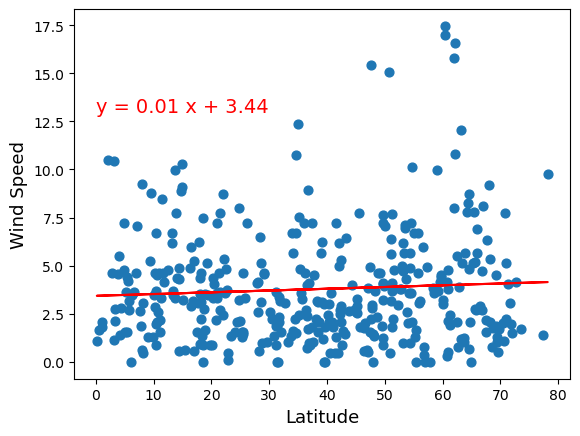

In [35]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed"
x_text=0
y_text=13
fig_num=11
Linear_Regression(x_value, y_value, x_label, y_label, x_text,y_text,fig_num)

The r-value is: -0.29829122710009326


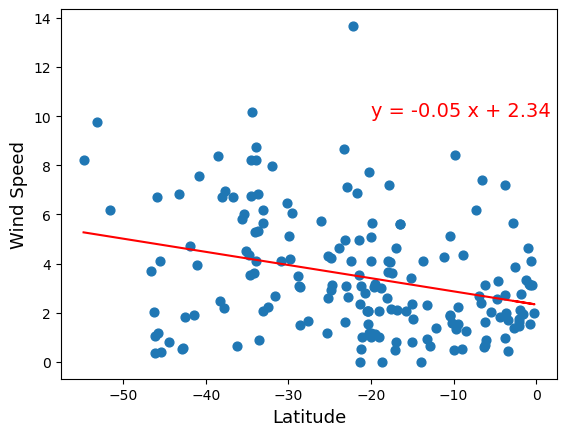

In [37]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Wind Speed"]
x_label="Latitude"
y_label="Wind Speed"
x_text=-20
y_text=10
fig_num=12
Linear_Regression(x_value, y_value, x_label, y_label, x_text,y_text,fig_num)

## Analysis between Wind speed and Latitude  
- Wind speed and latitude are not related on the northern hemisphere.(r value is 0.06) The southern hemisphere is more relevant than the northern hemisphere, but it does not show enough relevance to predict wind speed with latitude.(r value is -0.29)

# Corealtiong between (Humidity, Cloudiness, Wind speed) and Max Temperature

----------------------------------------------------------------------------------------------------
The Humidity-Max Temperature on Northern Hemisphere r-value is: -0.4940884929969226
The Cloudiness-Max Temperature Northern Hemisphere r-value is: -0.23359750007655722
The Wind speed-Max Temperature Northern Hemisphere r-value is: 0.12118175303520055
----------------------------------------------------------------------------------------------------


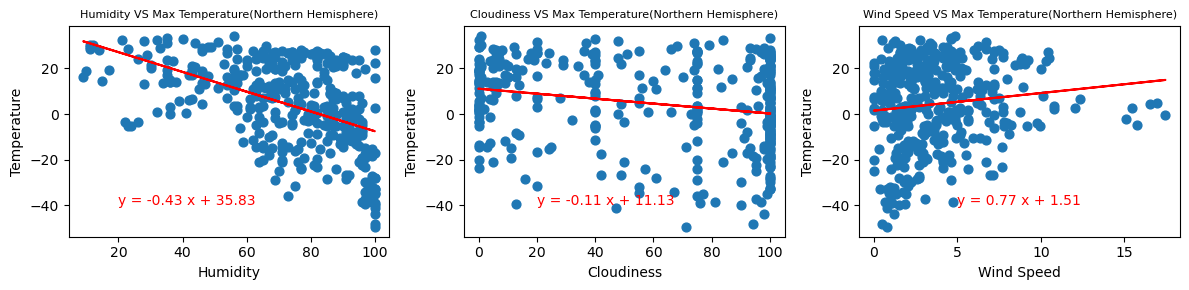

----------------------------------------------------------------------------------------------------
The Humidity-Max Temperature on Southern Hemisphere r-value is: -0.3884081335194451
The Cloudiness-Max Temperature on Southern Hemisphere r-value is: -0.22071698372665446
The Wind speed-Max Temperature on Southern Hemisphere r-value is: 0.1363343804657656
----------------------------------------------------------------------------------------------------


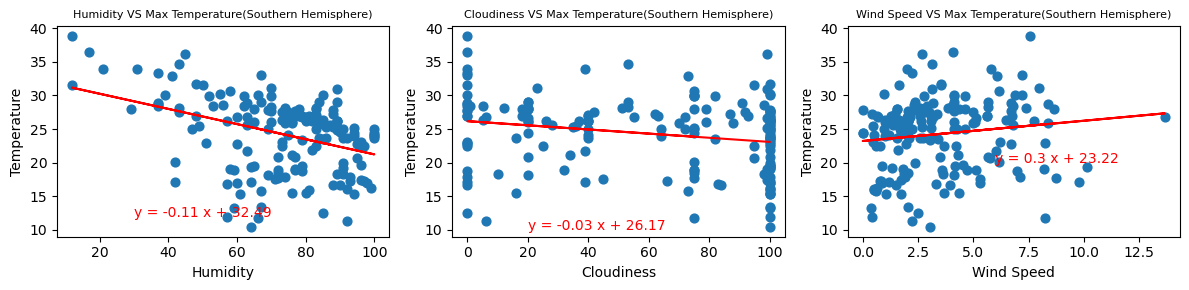

In [38]:
# northern Hemisphere

temp_value=northern_hemi_df["Max Temp"]
humidity_value=northern_hemi_df["Humidity"]
cloudiness_value=northern_hemi_df["Cloudiness"]
wind_value=northern_hemi_df["Wind Speed"]

(slope, intercept,hum_rvalue, pvalue, stderr)=st.linregress(humidity_value,temp_value)
humidity_regress_values= humidity_value * slope + intercept
humidity_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  

(slope, intercept,clo_rvalue, pvalue, stderr)=st.linregress(cloudiness_value,temp_value)
cloudiness_regress_values=cloudiness_value * slope + intercept
cloudiness_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(wind_value,temp_value)
wind_regress_values=wind_value * slope + intercept
wind_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}" 

hum_correlation = round(st.pearsonr(humidity_value,temp_value)[0],2)
clo_correlation = round(st.pearsonr(cloudiness_value,temp_value)[0],2)
win_correlation = round(st.pearsonr(wind_value,temp_value)[0],2)

print("-"*100)
print(f'The Humidity-Max Temperature on Northern Hemisphere r-value is: {hum_rvalue}')
print(f'The Cloudiness-Max Temperature Northern Hemisphere r-value is: {clo_rvalue}')
print(f'The Wind speed-Max Temperature Northern Hemisphere r-value is: {rvalue}')
print("-"*100)
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)               
plt.scatter(humidity_value, temp_value, color="#1f77b4",s=40)
plt.plot(humidity_value, humidity_regress_values,color='red')
plt.title('Humidity VS Max Temperature(Northern Hemisphere)', fontsize=8)
plt.ylabel('Temperature')
plt.xlabel('Humidity')
plt.annotate(humidity_eq,(20,-40), fontsize=10, color="red")

plt.subplot(1, 3, 2)  
plt.scatter(cloudiness_value, temp_value, color="#1f77b4",s=40)
plt.plot(cloudiness_value, cloudiness_regress_values,color='red')
plt.title('Cloudiness VS Max Temperature(Northern Hemisphere)', fontsize=8)
plt.ylabel('Temperature')
plt.xlabel('Cloudiness')
plt.annotate(cloudiness_eq,(20,-40), fontsize=10, color="red")

plt.subplot(1, 3, 3)  
plt.scatter(wind_value, temp_value, color="#1f77b4",s=40)
plt.plot(wind_value, wind_regress_values,color='red')
plt.title('Wind Speed VS Max Temperature(Northern Hemisphere)', fontsize=8)
plt.ylabel('Temperature')
plt.xlabel('Wind Speed')
plt.annotate(wind_eq,(5,-40), fontsize=10, color="red")
plt.tight_layout()
plt.savefig(f'output_data/Fig13.png')
plt.show()




# Southern Hemisphere

temp_value=southern_hemi_df["Max Temp"]
humidity_value=southern_hemi_df["Humidity"]
cloudiness_value=southern_hemi_df["Cloudiness"]
wind_value=southern_hemi_df["Wind Speed"]

(slope, intercept,hum_rvalue, pvalue, stderr)=st.linregress(humidity_value,temp_value)
humidity_regress_values= humidity_value * slope + intercept
humidity_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  

(slope, intercept,clo_rvalue, pvalue, stderr)=st.linregress(cloudiness_value,temp_value)
cloudiness_regress_values=cloudiness_value * slope + intercept
cloudiness_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"  

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(wind_value,temp_value)
wind_regress_values=wind_value * slope + intercept
wind_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}" 

print("-"*100)
print(f'The Humidity-Max Temperature on Southern Hemisphere r-value is: {hum_rvalue}')
print(f'The Cloudiness-Max Temperature on Southern Hemisphere r-value is: {clo_rvalue}')
print(f'The Wind speed-Max Temperature on Southern Hemisphere r-value is: {rvalue}')
print("-"*100)
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)               
plt.scatter(humidity_value, temp_value, color="#1f77b4",s=40)
plt.plot(humidity_value, humidity_regress_values,color='red')
plt.title('Humidity VS Max Temperature(Southern Hemisphere)', fontsize=8)
plt.ylabel('Temperature')
plt.xlabel('Humidity')
plt.annotate(humidity_eq,(30,12), fontsize=10, color="red")

plt.subplot(1, 3, 2)  
plt.scatter(cloudiness_value, temp_value, color="#1f77b4",s=40)
plt.plot(cloudiness_value, cloudiness_regress_values,color='red')
plt.title('Cloudiness VS Max Temperature(Southern Hemisphere)', fontsize=8)
plt.ylabel('Temperature')
plt.xlabel('Cloudiness')
plt.annotate(cloudiness_eq,(20,10), fontsize=10, color="red")

plt.subplot(1, 3, 3)  
plt.scatter(wind_value, temp_value, color="#1f77b4",s=40)
plt.plot(wind_value, wind_regress_values,color='red')
plt.title('Wind Speed VS Max Temperature(Southern Hemisphere)', fontsize=8)
plt.ylabel('Temperature')
plt.xlabel('Wind Speed')
plt.annotate(wind_eq,(6,20), fontsize=10, color="red")
plt.tight_layout()
plt.savefig(f'output_data/Fig14.png')
plt.show()



## Analysis between latitude and other facts related to the max temperature.
- On the Northern Hemispere, the correlation coefficient between humidity and temperature is (-0.49.)
- On the other hand, on the Southern Hemisphere, it is -0.38. 
- Through this, it can be seen that the higher the humidity, the lower the maximum temperature.
  The correlation coefficient is below 0.5, so it is difficult to say that the data is well explained.
  However it shows a higher correlation coefficient than other factors. Through this, it can be confirmed that humidity has some effect on the maximum temperatures on the both Hemishpere.
- In conclusion, it can be estimated that on the Southern Hemisphere, various factors other than latitude and humidity
- In the given data set, it can be seen that humidity affects temperature in addition to latitude.

